## **Perhitungan Manual**

---


Import Library

In [223]:
import numpy as np

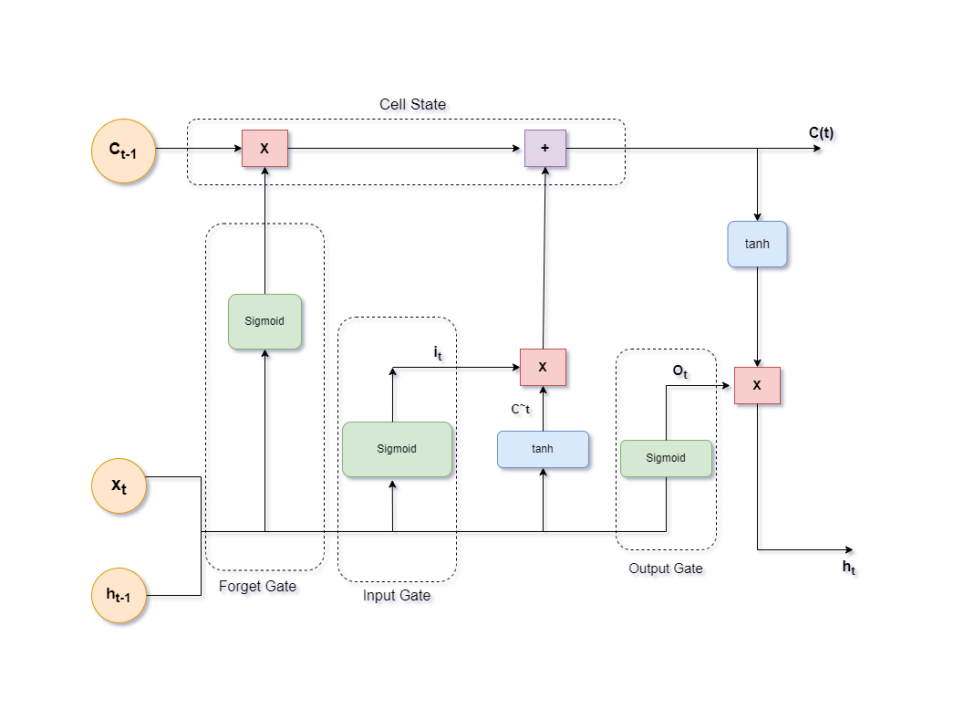

## Input Data

### 1. Input Kata

In [224]:
#Forward Gate
word = 'yang' 
x_t = np.array([-1.4, -1.7, 2.4, 6.5, -0.4, -1.5, 5.1, -1.8])

#Backward Gate
word_b = '<pad>' 
x_t_b = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [225]:
print("Input Kata pertama:", word, "(Forward Pass):", x_t)
print("Input Kata terakhir:", word_b, "(Backward Pass):", x_t_b)

Input Kata pertama: yang (Forward Pass): [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]
Input Kata terakhir: <pad> (Backward Pass): [0. 0. 0. 0. 0. 0. 0. 0.]


### 2. Hidden State Awal

$$ h_{f-1} = \text{Bobot Awal} $$
$$ b_{f-1} = \text{Bias Awal} $$

In [226]:
h_t_minus_1 = np.zeros(128)
c_t_minus_1 = np.zeros(128)

In [227]:
h_t_minus_1
c_t_minus_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Bobot dan Bias

### Inisialisasi bobot dan bias menjadi menggunakan Glorot Uniform

**Rumus:**
$$ \text{limit} = \sqrt{\frac{6}{{\text{fan\_in} + \text{fan\_out}}}} $$

**Variabel:**

- $fan_{in}$: jumlah unit di input layer.
- $fan_{out}$: jumlah unit di output layer.

In [228]:
def glorot_uniform(shape, fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=shape)

### 1. Forget Gate

- $W_f$: Bobot input untuk forget gate
- $U_f$: Bobot hidden state untuk forget gate
- $b_f$: Bias untuk forget gate

#### Ukuran Matriks

In [229]:
fan_in_W_f = 8
fan_out_W_f = 128

fan_in_U_f = 128
fan_out_U_f = 128

fan_in_W_f_b = 8
fan_out_W_f_b = 128

fan_in_U_f_b = 128
fan_out_U_f_b = 128

#### Fungsi Glorot Uniform

In [230]:
W_f = np.round(glorot_uniform((fan_in_W_f, fan_out_W_f), fan_in_W_f, fan_out_W_f), 1)
U_f = np.round(glorot_uniform((fan_in_U_f, fan_out_U_f), fan_in_U_f, fan_out_U_f), 1)
b_f = np.zeros(1)

W_f_b = np.round(glorot_uniform((fan_in_W_f_b, fan_out_W_f_b), fan_in_W_f_b, fan_out_W_f_b), 1)
U_f_b = np.round(glorot_uniform((fan_in_U_f_b, fan_out_U_f_b), fan_in_U_f_b, fan_out_U_f_b), 1)
b_f_b = np.zeros(1)

In [231]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_f)
print('Bobot Hidden : \n', U_f)
print('Bias : \n',b_f)

print('\n')

print('Bobot Backward Pass : \n')
print('Bobot Input : \n' ,W_f_b)
print('Bobot Hidden : \n', U_f_b)
print('Bias : \n',b_f_b)

Forward Pass : 

Bobot Input : 
 [[-0.1 -0.1  0.  ...  0.1  0.2  0.1]
 [ 0.1 -0.   0.1 ...  0.2 -0.   0.1]
 [-0.1  0.1 -0.1 ... -0.2 -0.1 -0.1]
 ...
 [-0.1 -0.1 -0.1 ... -0.  -0.1 -0. ]
 [ 0.1 -0.   0.1 ...  0.  -0.1  0.1]
 [-0.1  0.  -0.1 ...  0.2 -0.2 -0.1]]
Bobot Hidden : 
 [[ 0.1  0.1 -0.1 ...  0.1 -0.  -0. ]
 [-0.  -0.1 -0.  ... -0.1  0.1 -0.2]
 [-0.  -0.1  0.1 ... -0.1 -0.1 -0.1]
 ...
 [-0.1 -0.  -0.1 ...  0.1 -0.1 -0.1]
 [-0.1  0.1 -0.  ... -0.   0.1 -0.1]
 [-0.1 -0.1 -0.1 ... -0.1  0.   0.1]]
Bias : 
 [0.]


Bobot Backward Pass : 

Bobot Input : 
 [[ 0.1 -0.1 -0.2 ... -0.2 -0.   0. ]
 [ 0.1  0.1  0.1 ... -0.1 -0.   0.1]
 [-0.2 -0.  -0.1 ... -0.2 -0.  -0.2]
 ...
 [-0.2  0.2 -0.  ... -0.2  0.1 -0.1]
 [-0.2  0.   0.1 ... -0.1  0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.1 -0.1]]
Bobot Hidden : 
 [[-0.   0.  -0.  ... -0.  -0.  -0.1]
 [ 0.1 -0.   0.1 ... -0.1 -0.1 -0.1]
 [-0.  -0.  -0.  ... -0.1  0.   0. ]
 ...
 [ 0.1  0.1 -0.1 ...  0.1 -0.   0. ]
 [-0.1  0.1  0.1 ...  0.   0.   0. ]
 [ 

### 2. Input Gate

- $W_i$: Bobot input untuk input gate
- $U_i$: Bobot hidden state untuk input gate
- $b_i$: Bias untuk input gate

In [232]:
fan_in_W_i = 8
fan_out_W_i = 128

fan_in_U_i = 128
fan_out_U_i = 128

fan_in_W_i_b = 8
fan_out_W_i_b = 128

fan_in_U_i_b = 128
fan_out_U_i_b = 128

In [233]:
W_i = np.round(glorot_uniform((fan_in_W_i, fan_out_W_i), fan_in_W_i, fan_out_W_i), 1)
U_i = np.round(glorot_uniform((fan_in_U_i, fan_out_U_i), fan_in_U_i, fan_out_U_i), 1)
b_i = np.zeros(1)

W_i_b = np.round(glorot_uniform((fan_in_W_i_b, fan_out_W_i_b), fan_in_W_i_b, fan_out_W_i_b), 1)
U_i_b = np.round(glorot_uniform((fan_in_U_i_b, fan_out_U_i_b), fan_in_U_i_b, fan_out_U_i_b), 1)
b_i_b = np.zeros(1)

In [234]:
print('Forward Pass : \n')

print('Bobot Input : \n' ,W_i)
print('Bobot Hidden : \n', U_i)
print('Bias : \n',b_i)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_i_b)
print('Bobot Hidden : \n', U_i_b)
print('Bias : \n',b_i_b)


Forward Pass : 

Bobot Input : 
 [[-0.  -0.1  0.1 ... -0.1  0.1  0.1]
 [ 0.  -0.2 -0.  ... -0.2 -0.   0.2]
 [-0.1 -0.1  0.2 ...  0.1  0.1  0. ]
 ...
 [-0.1  0.1  0.1 ... -0.2  0.1 -0.2]
 [ 0.1  0.2 -0.2 ...  0.1  0.   0.2]
 [-0.1  0.1 -0.2 ... -0.2 -0.1 -0. ]]
Bobot Hidden : 
 [[ 0.2  0.1 -0.1 ...  0.1  0.1 -0.2]
 [-0.1 -0.1 -0.1 ...  0.1 -0.1  0. ]
 [-0.   0.1  0.1 ...  0.  -0.1 -0.1]
 ...
 [-0.1  0.1 -0.  ...  0.   0.1 -0.1]
 [ 0.1 -0.1 -0.1 ... -0.1 -0.   0. ]
 [-0.  -0.1  0.1 ... -0.1  0.1 -0.1]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.1 -0.1 -0.2 ... -0.2  0.1 -0.1]
 [ 0.1 -0.1 -0.1 ...  0.1  0.   0.2]
 [-0.1 -0.2  0.1 ...  0.2  0.2 -0.1]
 ...
 [ 0.  -0.   0.1 ... -0.  -0.2  0.2]
 [-0.1  0.   0.1 ...  0.  -0.  -0.2]
 [ 0.2 -0.2  0.1 ...  0.1  0.1  0.1]]
Bobot Hidden : 
 [[-0.1 -0.  -0.  ... -0.1 -0.  -0.1]
 [ 0.1 -0.   0.1 ... -0.1  0.1 -0.1]
 [-0.  -0.1  0.1 ... -0.1  0.1 -0. ]
 ...
 [-0.1  0.  -0.1 ...  0.1 -0.1  0.1]
 [-0.  -0.1  0.1 ...  0.  -0.1  0. ]
 [-0.1 -0

### 3. Cell State

- $W_c$: Bobot input untuk cell state candidate
- $U_c$: Bobot hidden state untuk cell state candidate
- $b_c$: Bias untuk cell state candidate

In [235]:
fan_in_W_c = 8
fan_out_W_c = 128

fan_in_U_c = 128
fan_out_U_c = 128

fan_in_W_c_b = 8
fan_out_W_c_b = 128

fan_in_U_c_b = 128
fan_out_U_c_b = 128

In [236]:
W_c = np.round(glorot_uniform((fan_in_W_c, fan_out_W_c), fan_in_W_c, fan_out_W_c), 1)
U_c = np.round(glorot_uniform((fan_in_U_c, fan_out_U_c), fan_in_U_c, fan_out_U_c), 1)
b_c = np.zeros(1)

W_c_b = np.round(glorot_uniform((fan_in_W_c_b, fan_out_W_c_b), fan_in_W_c_b, fan_out_W_c_b), 1)
U_c_b = np.round(glorot_uniform((fan_in_U_c_b, fan_out_U_c_b), fan_in_U_c_b, fan_out_U_c_b), 1)
b_c_b = np.zeros(1)

In [237]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_c)
print('Bobot Hidden : \n', U_c)
print('Bias : \n',b_c)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_c_b)
print('Bobot Hidden : \n', U_c_b)
print('Bias : \n',b_c_b)

Forward Pass : 

Bobot Input : 
 [[ 0.2 -0.2 -0.1 ...  0.  -0.2 -0.1]
 [ 0.1 -0.  -0.1 ...  0.   0.   0.2]
 [ 0.1 -0.   0.2 ... -0.  -0.2 -0.2]
 ...
 [-0.2 -0.1 -0.2 ... -0.1  0.1 -0. ]
 [ 0.  -0.  -0.1 ... -0.2  0.  -0.1]
 [ 0.1  0.1 -0.2 ... -0.1  0.1 -0.2]]
Bobot Hidden : 
 [[ 0.1 -0.   0.1 ...  0.  -0.1  0.1]
 [ 0.1 -0.   0.1 ... -0.1  0.1 -0.1]
 [ 0.  -0.1 -0.1 ...  0.1  0.1 -0.1]
 ...
 [-0.1 -0.1  0.1 ...  0.1  0.   0. ]
 [-0.1 -0.1 -0.1 ...  0.   0.   0.1]
 [ 0.1 -0.  -0.2 ...  0.1 -0.1 -0. ]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.  -0.   0.1 ...  0.   0.2  0. ]
 [-0.1 -0.1  0.2 ...  0.2 -0.2  0.2]
 [ 0.1 -0.1 -0.2 ... -0.   0.   0.2]
 ...
 [-0.  -0.   0.1 ... -0.2 -0.1 -0.2]
 [ 0.2  0.1  0.1 ...  0.2  0.2  0.1]
 [-0.1  0.1 -0.1 ...  0.1  0.  -0.1]]
Bobot Hidden : 
 [[-0.1 -0.2 -0.1 ... -0.1 -0.   0.1]
 [ 0.1 -0.   0.1 ...  0.2 -0.1 -0.1]
 [-0.1  0.  -0.1 ...  0.   0.1  0. ]
 ...
 [-0.1 -0.1  0.1 ...  0.1  0.   0.1]
 [ 0.1  0.  -0.  ... -0.  -0.1  0.1]
 [-0.1 -0

### 4. Output Gate

- $W_o$: Bobot input untuk output gate
- $U_o$: Bobot hidden state untuk output gate
- $b_o$: Bias untuk output gate

In [238]:
fan_in_W_o = 8
fan_out_W_o = 128

fan_in_U_o = 128
fan_out_U_o = 128

fan_in_W_o_b = 8
fan_out_W_o_b = 128

fan_in_U_o_b = 128
fan_out_U_o_b = 128

In [239]:
W_o = np.round(glorot_uniform((fan_in_W_o, fan_out_W_o), fan_in_W_o, fan_out_W_o), 1)
U_o = np.round(glorot_uniform((fan_in_U_o, fan_out_U_o), fan_in_U_o, fan_out_U_o), 1)
b_o = np.zeros(1)

W_o_b = np.round(glorot_uniform((fan_in_W_o_b, fan_out_W_o_b), fan_in_W_o_b, fan_out_W_o_b), 1)
U_o_b = np.round(glorot_uniform((fan_in_U_o_b, fan_out_U_o_b), fan_in_U_o_b, fan_out_U_o_b), 1)
b_o_b = np.zeros(1)

In [240]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_o)
print('Bobot Hidden : \n', U_o)
print('Bias : \n',b_o)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_o_b)
print('Bobot Hidden : \n', U_o_b)
print('Bias : \n',b_o_b)

Forward Pass : 

Bobot Input : 
 [[-0.1  0.1 -0.1 ...  0.1  0.2 -0.2]
 [-0.1 -0.1  0.  ... -0.1  0.1 -0. ]
 [-0.2  0.1  0.1 ... -0.   0.2 -0.2]
 ...
 [ 0.1 -0.1 -0.  ...  0.2  0.2  0.1]
 [ 0.   0.1 -0.  ... -0.1 -0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.   0. ]]
Bobot Hidden : 
 [[-0.1  0.1  0.  ... -0.   0.   0. ]
 [ 0.1  0.1 -0.1 ...  0.  -0.1 -0.1]
 [-0.1  0.1  0.1 ...  0.1 -0.1  0.1]
 ...
 [ 0.1  0.   0.1 ... -0.1 -0.1  0. ]
 [ 0.1  0.1 -0.  ...  0.1  0.   0.1]
 [ 0.1  0.1 -0.1 ...  0.  -0.1 -0. ]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.1 -0.  -0.2 ... -0.   0.2  0.1]
 [ 0.2  0.2  0.2 ... -0.2  0.1  0.1]
 [ 0.1 -0.1 -0.  ... -0.1  0.1  0. ]
 ...
 [ 0.   0.  -0.1 ... -0.2 -0.2  0.1]
 [-0.1  0.1 -0.1 ... -0.1 -0.   0. ]
 [ 0.2 -0.2  0.1 ...  0.2  0.   0. ]]
Bobot Hidden : 
 [[-0.  -0.1 -0.1 ... -0.1  0.  -0. ]
 [-0.1 -0.   0.1 ... -0.1  0.1  0.1]
 [ 0.  -0.   0.1 ... -0.  -0.   0.1]
 ...
 [ 0.   0.1  0.  ...  0.1 -0.1  0.1]
 [ 0.1 -0.  -0.1 ... -0.1  0.  -0.1]
 [ 0.1  0

### 5. Klasifikasi
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $b_{\text{clf}}$: Bias untuk klasifikasi

In [241]:
fan_in_W_clf = 256
fan_out_W_clf = 16

In [242]:
W_clf = np.round(glorot_uniform((fan_in_W_clf, fan_out_W_clf), fan_in_W_clf, fan_out_W_clf), 1)
b_clf = np.zeros(1)

In [243]:
print('Bobot Input : \n' ,W_clf)
print('Bias : \n',b_clf)

Bobot Input : 
 [[-0.1  0.1 -0.1 ... -0.1  0.1  0. ]
 [-0.1 -0.1  0.  ... -0.  -0.1 -0.1]
 [ 0.   0.1  0.1 ... -0.  -0.   0.1]
 ...
 [ 0.1  0.1 -0.  ...  0.   0.1 -0.1]
 [-0.1 -0.1  0.  ...  0.1 -0.1 -0. ]
 [-0.   0.1 -0.1 ... -0.1  0.1 -0.1]]
Bias : 
 [0.]


## Fungsi Aktivasi

### 1. Sigmoid

**Rumus:**
$$ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

**Variabel:**

- **$x$**: Nilai input yang akan diubah oleh fungsi sigmoid. Ini bisa berupa output dari layer sebelumnya dalam jaringan neural.
- **$e$**: Bilangan Euler (sekitar 2.71828), yang merupakan basis dari logaritma alami.
- **$\text{sigmoid}(x)$**: Output dari fungsi sigmoid, yang akan berada dalam rentang (0, 1).





In [244]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 2. Softmax

**Rumus:**
$$ \text{softmax}(x) = \frac{e^{x - \max(x)}}{\sum e^{x - \max(x)}} $$

**Variabel:**
- **$x$**: Vektor input yang berisi nilai mentah (logit) untuk setiap kelas.
- **$x_i$**: Nilai input untuk kelas ke-$i$.
- **$\max(x)$**: Nilai maksimum dalam vektor $x$. Ini sering digunakan untuk stabilitas numerik agar nilai eksponensial tidak menjadi terlalu besar.
- **$e$**: Bilangan Euler (sekitar 2.71828).
- **$\text{softmax}(x_i)$**: Output dari fungsi softmax untuk kelas ke-$i$, yang merupakan probabilitas prediksi untuk kelas tersebut.
- **$\sum_{j}$**: Penjumlahan nilai eksponensial dari semua kelas $j$.




In [245]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

### 3. ReLU (Rectified Linear Unit)

**Rumus:**
$$ \text{ReLU}(x) = \max(0, x) $$

**Variabel:**
- **$x$**: Nilai input yang diterima oleh fungsi aktivasi.
- **$\max(0, x)$**: Fungsi yang mengambil nilai maksimum antara 0 dan $x$. Jika $x$ positif atau nol, output adalah $x$. Jika $x$ negatif, output adalah 0.
- **$\text{ReLU}(x)$**: Output dari fungsi ReLU, yang merupakan nilai yang sudah melalui proses aktivasi.

In [246]:
def relu(x):
    return np.maximum(0, x)

## Tahapan

### 1. Forget Gate

**Rumus:**
$$ f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f) $$

**Variabel:**

- $f_t$: Forget gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_f$: Bobot input untuk forget gate
- $x_t$: Input pada waktu $t$
- $U_f$: Bobot hidden state untuk forget gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_f$: Bias untuk forget gate



In [247]:
#Forward Pass
def calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f):
    return sigmoid(np.dot(x_t, W_f) + np.dot(h_t_minus_1, U_f) + b_f)

#Backward Pass
def calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b):
    return sigmoid(np.dot(x_t_b, W_f_b) + np.dot(h_t_minus_1, U_f_b) + b_f_b)


In [248]:
f_t = calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f)
print(f"f_t ({W_f}) x X_t ({x_t}) \n + \n U_f ({U_f}) x h_t-1 ({h_t_minus_1}) \n + \n b_f({b_f})")
print(f"\n Hasil Forget Gate (Forward Pass): {f_t}")

f_t ([[-0.1 -0.1  0.  ...  0.1  0.2  0.1]
 [ 0.1 -0.   0.1 ...  0.2 -0.   0.1]
 [-0.1  0.1 -0.1 ... -0.2 -0.1 -0.1]
 ...
 [-0.1 -0.1 -0.1 ... -0.  -0.1 -0. ]
 [ 0.1 -0.   0.1 ...  0.  -0.1  0.1]
 [-0.1  0.  -0.1 ...  0.2 -0.2 -0.1]]) x X_t ([-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]) 
 + 
 U_f ([[ 0.1  0.1 -0.1 ...  0.1 -0.  -0. ]
 [-0.  -0.1 -0.  ... -0.1  0.1 -0.2]
 [-0.  -0.1  0.1 ... -0.1 -0.1 -0.1]
 ...
 [-0.1 -0.  -0.1 ...  0.1 -0.1 -0.1]
 [-0.1  0.1 -0.  ... -0.   0.1 -0.1]
 [-0.1 -0.1 -0.1 ... -0.1  0.   0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_f([0.])

 Hasil Forget Gate (Forward Pass): [0.87101915 0.29943286 

In [249]:
f_t_b = calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b)
print(f"f_t ({W_f_b}) x X_t ({x_t_b}) \n + \n U_f ({U_f_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_f({b_f_b})")
print(f"\n Hasil Forget Gate (Backward Pass): {f_t_b}")

f_t ([[ 0.1 -0.1 -0.2 ... -0.2 -0.   0. ]
 [ 0.1  0.1  0.1 ... -0.1 -0.   0.1]
 [-0.2 -0.  -0.1 ... -0.2 -0.  -0.2]
 ...
 [-0.2  0.2 -0.  ... -0.2  0.1 -0.1]
 [-0.2  0.   0.1 ... -0.1  0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.1 -0.1]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_f ([[-0.   0.  -0.  ... -0.  -0.  -0.1]
 [ 0.1 -0.   0.1 ... -0.1 -0.1 -0.1]
 [-0.  -0.  -0.  ... -0.1  0.   0. ]
 ...
 [ 0.1  0.1 -0.1 ...  0.1 -0.   0. ]
 [-0.1  0.1  0.1 ...  0.   0.   0. ]
 [ 0.  -0.1 -0.1 ... -0.  -0.1 -0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_f([0.])

 Hasil Forget Gate (Backward Pass): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0

### 2. Input Gate

**Rumus:**
$$ i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1} + b_i) $$

**Variabel:**
- $i_t$: Input gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_i$: Bobot input untuk input gate
- $x_t$: Input pada waktu $t$
- $U_i$: Bobot hidden state untuk input gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_i$: Bias untuk input gate

In [250]:
#Forward Pass
def calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i):
    return sigmoid(np.dot(x_t, W_i) + np.dot(h_t_minus_1, U_i) + b_i)

#Backward Pass
def calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b):
    return sigmoid(np.dot(x_t_b, W_i_b) + np.dot(h_t_minus_1, U_i_b) + b_i_b)

In [251]:
i_t = calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i)
print(f"i_t ({W_i}) x X_t ({x_t}) \n + \n U_i ({U_i}) x h_t-1 ({h_t_minus_1}) \n + \n b_i({b_i})")
print(f"\n Hasil Input Gate (Forward Pass): {i_t}")

i_t ([[-0.  -0.1  0.1 ... -0.1  0.1  0.1]
 [ 0.  -0.2 -0.  ... -0.2 -0.   0.2]
 [-0.1 -0.1  0.2 ...  0.1  0.1  0. ]
 ...
 [-0.1  0.1  0.1 ... -0.2  0.1 -0.2]
 [ 0.1  0.2 -0.2 ...  0.1  0.   0.2]
 [-0.1  0.1 -0.2 ... -0.2 -0.1 -0. ]]) x X_t ([-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]) 
 + 
 U_i ([[ 0.2  0.1 -0.1 ...  0.1  0.1 -0.2]
 [-0.1 -0.1 -0.1 ...  0.1 -0.1  0. ]
 [-0.   0.1  0.1 ...  0.  -0.1 -0.1]
 ...
 [-0.1  0.1 -0.  ...  0.   0.1 -0.1]
 [ 0.1 -0.1 -0.1 ... -0.1 -0.   0. ]
 [-0.  -0.1  0.1 ... -0.1  0.1 -0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_i([0.])

 Hasil Input Gate (Forward Pass): [0.77729986 0.41824062 0

In [252]:
i_t_b = calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b)
print(f"i_t ({W_i_b}) x X_t ({x_t_b}) \n + \n U_i ({U_i_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_i({b_i_b})")
print(f"\n Hasil Input Gate (Backward Pass): {i_t_b}")

i_t ([[-0.1 -0.1 -0.2 ... -0.2  0.1 -0.1]
 [ 0.1 -0.1 -0.1 ...  0.1  0.   0.2]
 [-0.1 -0.2  0.1 ...  0.2  0.2 -0.1]
 ...
 [ 0.  -0.   0.1 ... -0.  -0.2  0.2]
 [-0.1  0.   0.1 ...  0.  -0.  -0.2]
 [ 0.2 -0.2  0.1 ...  0.1  0.1  0.1]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_i ([[-0.1 -0.  -0.  ... -0.1 -0.  -0.1]
 [ 0.1 -0.   0.1 ... -0.1  0.1 -0.1]
 [-0.  -0.1  0.1 ... -0.1  0.1 -0. ]
 ...
 [-0.1  0.  -0.1 ...  0.1 -0.1  0.1]
 [-0.  -0.1  0.1 ...  0.  -0.1  0. ]
 [-0.1 -0.1 -0.1 ...  0.1 -0.1 -0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_i([0.])

 Hasil Input Gate (Backward Pass): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### 3. Candidate Cell

**Rumus:**
$$ \tilde{c}_t = \tanh(W_c \cdot x_t + U_c \cdot h_{t-1} + b_c) $$

**Variabel:**
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$
- $\tanh$: Fungsi tanh
- $W_c$: Bobot input untuk cell state candidate
- $x_t$: Input pada waktu $t$
- $U_c$: Bobot hidden state untuk cell state candidate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_c$: Bias untuk cell state candidate



In [253]:
#Forward Pass
def calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c):
    return np.tanh(np.dot(x_t, W_c) + np.dot(h_t_minus_1, U_c) + b_c)

#Backward Pass
def calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b):
    return np.tanh(np.dot(x_t_b, W_c_b) + np.dot(h_t_minus_1, U_c_b) + b_c_b)

In [254]:
c_tilde_t = calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c)
print(f"c_tilde_t ({W_c}) x X_t ({x_t}) \n + \n U_c ({U_c}) x h_t-1 ({h_t_minus_1}) \n + \n b_c({b_c})")
print(f"\n Hasil Candidate (Forward Pass): {c_tilde_t}")

c_tilde_t ([[ 0.2 -0.2 -0.1 ...  0.  -0.2 -0.1]
 [ 0.1 -0.  -0.1 ...  0.   0.   0.2]
 [ 0.1 -0.   0.2 ... -0.  -0.2 -0.2]
 ...
 [-0.2 -0.1 -0.2 ... -0.1  0.1 -0. ]
 [ 0.  -0.  -0.1 ... -0.2  0.  -0.1]
 [ 0.1  0.1 -0.2 ... -0.1  0.1 -0.2]]) x X_t ([-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]) 
 + 
 U_c ([[ 0.1 -0.   0.1 ...  0.  -0.1  0.1]
 [ 0.1 -0.   0.1 ... -0.1  0.1 -0.1]
 [ 0.  -0.1 -0.1 ...  0.1  0.1 -0.1]
 ...
 [-0.1 -0.1  0.1 ...  0.1  0.   0. ]
 [-0.1 -0.1 -0.1 ...  0.   0.   0.1]
 [ 0.1 -0.  -0.2 ...  0.1 -0.1 -0. ]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_c([0.])

 Hasil Candidate (Forward Pass): [-6.52706706e-01  2

In [255]:
c_tilde_t_b = calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b)
print(f"c_tilde_t ({W_c_b}) x X_t ({x_t_b}) \n + \n U_c ({U_c_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_c({b_c_b})")
print(f"\n Hasil Candidate (Backward Pass): {c_tilde_t_b}")

c_tilde_t ([[-0.  -0.   0.1 ...  0.   0.2  0. ]
 [-0.1 -0.1  0.2 ...  0.2 -0.2  0.2]
 [ 0.1 -0.1 -0.2 ... -0.   0.   0.2]
 ...
 [-0.  -0.   0.1 ... -0.2 -0.1 -0.2]
 [ 0.2  0.1  0.1 ...  0.2  0.2  0.1]
 [-0.1  0.1 -0.1 ...  0.1  0.  -0.1]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_c ([[-0.1 -0.2 -0.1 ... -0.1 -0.   0.1]
 [ 0.1 -0.   0.1 ...  0.2 -0.1 -0.1]
 [-0.1  0.  -0.1 ...  0.   0.1  0. ]
 ...
 [-0.1 -0.1  0.1 ...  0.1  0.   0.1]
 [ 0.1  0.  -0.  ... -0.  -0.1  0.1]
 [-0.1 -0.   0.1 ...  0.  -0.   0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_c([0.])

 Hasil Candidate (Backward Pass): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### 4. Cell State Update

**Rumus:**
$$ c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t $$

**Variabel:**
- $c_t$: Cell state pada waktu $t$
- $f_t$: Forget gate activation pada waktu $t$
- $c_{t-1}$: Cell state pada waktu $t-1$
- $i_t$: Input gate activation pada waktu $t$
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$


In [256]:
#Forward Pass
def calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t):
    return f_t * c_t_minus_1 + i_t * c_tilde_t

#Backward Pass
def calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b):
    return f_t_b * c_t_minus_1 + i_t_b * c_tilde_t_b

In [257]:
c_t = calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t)
print(f"f_t ({f_t}) x c_t-1 ({c_t_minus_1}) \n + \n i_t ({i_t}) x c_tilde_t ({c_tilde_t})")
print(f"\n Hasil Cell State (Forward Pass): {c_t}")

f_t ([0.87101915 0.29943286 0.44522076 0.35893259 0.73885001 0.38698582
 0.64336515 0.32519473 0.70682222 0.7349726  0.39174097 0.19623406
 0.08948006 0.94047563 0.50499983 0.23325894 0.840238   0.3362613
 0.0511737  0.84683628 0.4725277  0.55230791 0.64565631 0.57688526
 0.62714777 0.13705129 0.89090318 0.4037173  0.75951092 0.28292471
 0.78244978 0.27091208 0.58419052 0.34524654 0.32300414 0.37754067
 0.06913842 0.25730945 0.77556401 0.64336515 0.46505705 0.65248946
 0.22970105 0.22097389 0.17364665 0.20261985 0.26697985 0.34751054
 0.74269055 0.39412633 0.13238887 0.62714777 0.15446527 0.80845465
 0.32519473 0.60825903 0.28292471 0.08241332 0.37989357 0.14063813
 0.86645828 0.39891212 0.78414719 0.14307272 0.31864627 0.84941242
 0.58661758 0.88894403 0.36586441 0.549834   0.37519353 0.19623406
 0.58904043 0.82200631 0.78751316 0.10716807 0.21081829 0.61538376
 0.60348325 0.52248482 0.60348325 0.28699984 0.4037173  0.72111518
 0.81305739 0.15446527 0.26697985 0.83616964 0.08548914 0.

In [258]:
c_t_b = calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b)
print(f"f_t ({f_t_b}) x c_t-1 ({c_t_minus_1}) \n + \n i_t ({i_t_b}) x c_tilde_t ({c_tilde_t_b})")
print(f"\n Hasil Cell State (Backward Pass): {c_t_b}")

f_t ([0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]) x c_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 i_t ([0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 

### 5. Output Gate

**Rumus:**
$$ o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1} + b_o) $$

**Variabel:**
- $o_t$: Output gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_o$: Bobot input untuk output gate
- $x_t$: Input pada waktu $t$
- $U_o$: Bobot hidden state untuk output gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_o$: Bias untuk output gate



In [259]:
#Forward Pass
def calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o):
    return sigmoid(np.dot(x_t, W_o) + np.dot(h_t_minus_1, U_o) + b_o)

#Backward Pass
def calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b):
    return sigmoid(np.dot(x_t_b, W_o_b) + np.dot(h_t_minus_1, U_o_b) + b_o_b)

In [260]:
o_t = calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o)
print(f"o_t ({W_o}) x X_t ({x_t}) \n + \n U_o ({U_o}) x h_t-1 ({h_t_minus_1}) \n + \n b_o({b_o})")
print(f"\n Hasil Output Gate (Forward Pass): {o_t}")

o_t ([[-0.1  0.1 -0.1 ...  0.1  0.2 -0.2]
 [-0.1 -0.1  0.  ... -0.1  0.1 -0. ]
 [-0.2  0.1  0.1 ... -0.   0.2 -0.2]
 ...
 [ 0.1 -0.1 -0.  ...  0.2  0.2  0.1]
 [ 0.   0.1 -0.  ... -0.1 -0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.   0. ]]) x X_t ([-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]) 
 + 
 U_o ([[-0.1  0.1  0.  ... -0.   0.   0. ]
 [ 0.1  0.1 -0.1 ...  0.  -0.1 -0.1]
 [-0.1  0.1  0.1 ...  0.1 -0.1  0.1]
 ...
 [ 0.1  0.   0.1 ... -0.1 -0.1  0. ]
 [ 0.1  0.1 -0.  ...  0.1  0.   0.1]
 [ 0.1  0.1 -0.1 ...  0.  -0.1 -0. ]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_o([0.])

 Hasil Output Gate (Forward Pass): [0.26697985 0.60348325 

In [261]:
o_t_b = calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b)
print(f"o_t ({W_o_b}) x X_t ({x_t_b}) \n + \n U_o ({U_o_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_o({b_o_b})")
print(f"\n Hasil Output Gate (Backward Pass): {o_t_b}")

o_t ([[-0.1 -0.  -0.2 ... -0.   0.2  0.1]
 [ 0.2  0.2  0.2 ... -0.2  0.1  0.1]
 [ 0.1 -0.1 -0.  ... -0.1  0.1  0. ]
 ...
 [ 0.   0.  -0.1 ... -0.2 -0.2  0.1]
 [-0.1  0.1 -0.1 ... -0.1 -0.   0. ]
 [ 0.2 -0.2  0.1 ...  0.2  0.   0. ]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_o ([[-0.  -0.1 -0.1 ... -0.1  0.  -0. ]
 [-0.1 -0.   0.1 ... -0.1  0.1  0.1]
 [ 0.  -0.   0.1 ... -0.  -0.   0.1]
 ...
 [ 0.   0.1  0.  ...  0.1 -0.1  0.1]
 [ 0.1 -0.  -0.1 ... -0.1  0.  -0.1]
 [ 0.1  0.  -0.1 ... -0.   0.   0.1]]) x h_t-1 ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 b_o([0.])

 Hasil Output Gate (Backward Pass): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0

### 6. Hidden State Update

**Rumus:**
$$ h_t = o_t \cdot \tanh(c_t) $$

**Variabel:**
- $h_t$: Hidden state pada waktu $t$
- $o_t$: Output gate activation pada waktu $t$
- $\tanh$: Fungsi tanh
- $c_t$: Cell state pada waktu $t$


In [262]:
#Forward Pass
def calculate_hidden_state(o_t, c_t):
    return o_t * np.tanh(c_t)

#Backward Pass
def calculate_hidden_state_b(o_t_b, c_t_b):
    return o_t_b * np.tanh(c_t_b)

In [263]:
h_t = calculate_hidden_state(o_t, c_t)
print(f"o_t ({o_t}) x c_t ({c_t})")
print(f"\n Hasil Hidden State (Forward Pass): {h_t}")

o_t ([0.26697985 0.60348325 0.87435214 0.34751054 0.32739298 0.37754067
 0.36818758 0.798991   0.62714777 0.07798824 0.3362613  0.86645828
 0.59868766 0.65248946 0.62480647 0.80376594 0.63645254 0.46754569
 0.83753494 0.5274723  0.37285223 0.17946152 0.24601128 0.36354746
 0.32300414 0.57199613 0.41095957 0.60108788 0.96442881 0.53742985
 0.71300016 0.78583498 0.55971365 0.86645828 0.67040116 0.79738015
 0.2890505  0.22618143 0.68135373 0.82200631 0.58661758 0.54735762
 0.69423634 0.31216867 0.79084063 0.76852478 0.50249998 0.13470305
 0.82200631 0.88795296 0.92201176 0.35893259 0.49750002 0.13705129
 0.43536371 0.67699586 0.159762   0.54239794 0.89283193 0.35434369
 0.5621765  0.20915937 0.75026011 0.91213609 0.96408415 0.80533842
 0.67260702 0.60108788 0.159762   0.88695417 0.6921095  0.4850045
 0.22970105 0.77729986 0.13705129 0.5621765  0.15577584 0.44028635
 0.71504211 0.24787089 0.34073961 0.70889017 0.8519528  0.67480527
 0.39412633 0.87544664 0.79412963 0.78414719 0.13705129 0.

In [264]:
h_t_b = calculate_hidden_state_b(o_t_b, c_t_b)
print(f"o_t ({o_t_b}) x c_t ({c_t_b})")
print(f"\n Hasil Hidden State (Backward Pass): {h_t_b}")

o_t ([0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]) x c_t ([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.])

 Hasil Hidden State (Backward Pass): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#### Inisialialisasi Akhir

In [265]:
c_prev = c_t
h_prev = h_t

c_prev_b = c_t_b
h_prev_b = h_t_b


print("Forward Pass")
print(f"Final Cell State: {c_prev}")
print(f"Final Hidden State: {h_prev}")

print("\n")
print("Backward Pass")
print(f"Final Cell State: {c_prev_b}")
print(f"Final Hidden State: {h_prev_b}")


Forward Pass
Final Cell State: [-5.07348832e-01  8.65617978e-02  6.40750435e-01 -5.00852712e-01
  2.20805414e-02 -1.80379089e-01 -1.48459765e-01 -1.48600375e-01
  7.81012138e-02  4.91429542e-01 -1.74379891e-01  3.83301754e-01
  4.59519474e-01 -1.95687807e-01  3.42755379e-01 -4.67714077e-02
 -2.44676956e-01  1.62660443e-01  4.46054782e-01  2.87963830e-01
  7.97627158e-02 -2.11193227e-01 -6.08356531e-01  5.92503666e-01
  1.77926007e-01  2.62710522e-01 -4.95382532e-01 -4.52658787e-01
  1.09341585e-01  2.23843344e-01 -2.96036674e-01  4.61989763e-01
 -9.15653472e-02 -2.15857646e-01  1.97251147e-01  2.28911612e-01
 -1.74124815e-01  2.53722856e-01  1.60166298e-01 -3.91286946e-02
  4.82425297e-01  1.55527221e-01 -1.78082372e-01  2.04233495e-03
 -1.57368840e-01 -6.03960454e-01  7.22102405e-02 -2.83193248e-01
 -4.05315867e-01 -5.87958932e-01 -3.89295264e-01  3.02547977e-01
  6.41826118e-01  2.48613089e-01 -3.01047436e-01  0.00000000e+00
 -4.97203355e-02 -1.93020688e-02 -3.10123655e-02 -2.4374554

### 7. Concate

In [266]:
h_bil = np.concatenate((h_prev, h_prev_b))

h_bil

array([-1.24913722e-01,  5.21085113e-02,  4.94367707e-01, -1.60823535e-01,
        7.22783969e-03, -6.73713435e-02, -5.42629692e-02, -1.17864076e-01,
        4.88816527e-02,  3.55119667e-02, -5.80499971e-02,  3.16752377e-01,
        2.57251590e-01, -1.26078981e-01,  2.06145561e-01, -3.75658760e-02,
       -1.52690335e-01,  7.53874815e-02,  3.50634538e-01,  1.47829202e-01,
        2.96767979e-02, -3.73474375e-02, -1.33576546e-01,  1.93295960e-01,
        5.68719560e-02,  1.46905208e-01, -1.88415928e-01, -2.54910597e-01,
        1.05033927e-01,  1.18330317e-01, -2.05116923e-01,  3.39248526e-01,
       -5.11076220e-02, -1.84179899e-01,  1.30548644e-01,  1.79406799e-01,
       -4.98282907e-02,  5.61868585e-02,  1.08206203e-01, -3.21476291e-02,
        2.62912523e-01,  8.44491991e-02, -1.22340703e-01,  6.37552096e-04,
       -1.23436386e-01, -4.14897129e-01,  3.62227073e-02, -3.71589039e-02,
       -3.16051739e-01, -4.69217487e-01, -3.41838187e-01,  1.05397909e-01,
        2.81655484e-01,  

### 8. Klasifikasi

**Rumus:**
$$ \text{logits} = \text{ReLU}(W_{\text{clf}} \cdot h_t + b_{\text{clf}}) $$
$$ \text{prediksi} = \text{softmax}(\text{logits}) $$

**Variabel:**
- $\text{logits}$: Nilai logit untuk klasifikasi setelah melalui fungsi aktivasi ReLU
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $h_t$: Hidden state pada waktu $t$
- $b_{\text{clf}}$: Bias untuk klasifikasi
- $\text{ReLU}$: Fungsi aktivasi Rectified Linear Unit
- $\text{softmax}$: Fungsi softmax untuk mendapatkan probabilitas kelas

In [267]:
def classify(h_bil, W_clf, b_clf):
    logits = relu(np.dot(h_bil, W_clf) + b_clf)
    return softmax(logits)

### Fungsi Relu

In [268]:
prediction = classify(h_bil, W_clf, b_clf)
print(f"Relu \n({W_clf} x h_t({h_bil})\n + b_clf({b_clf})")
print(f" \nPrediction scores: {prediction}\n")

Relu 
([[-0.1  0.1 -0.1 ... -0.1  0.1  0. ]
 [-0.1 -0.1  0.  ... -0.  -0.1 -0.1]
 [ 0.   0.1  0.1 ... -0.  -0.   0.1]
 ...
 [ 0.1  0.1 -0.  ...  0.   0.1 -0.1]
 [-0.1 -0.1  0.  ...  0.1 -0.1 -0. ]
 [-0.   0.1 -0.1 ... -0.1  0.1 -0.1]] x h_t([-1.24913722e-01  5.21085113e-02  4.94367707e-01 -1.60823535e-01
  7.22783969e-03 -6.73713435e-02 -5.42629692e-02 -1.17864076e-01
  4.88816527e-02  3.55119667e-02 -5.80499971e-02  3.16752377e-01
  2.57251590e-01 -1.26078981e-01  2.06145561e-01 -3.75658760e-02
 -1.52690335e-01  7.53874815e-02  3.50634538e-01  1.47829202e-01
  2.96767979e-02 -3.73474375e-02 -1.33576546e-01  1.93295960e-01
  5.68719560e-02  1.46905208e-01 -1.88415928e-01 -2.54910597e-01
  1.05033927e-01  1.18330317e-01 -2.05116923e-01  3.39248526e-01
 -5.11076220e-02 -1.84179899e-01  1.30548644e-01  1.79406799e-01
 -4.98282907e-02  5.61868585e-02  1.08206203e-01 -3.21476291e-02
  2.62912523e-01  8.44491991e-02 -1.22340703e-01  6.37552096e-04
 -1.23436386e-01 -4.14897129e-01  3.62227073

### Fungsi Softmax

In [269]:
# Emotion labels
emotion_labels = ['joy', 'sad', 'fear', 'anger', 'neutral', 'love']

# Find the index of the maximum prediction score
max_index = np.argmax(prediction)

# Get the predicted emotion using the found index
predicted_emotion = emotion_labels[max_index % len(emotion_labels)]  

# Print the predicted emotion
print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: neutral


In [270]:
max_index

10

# Perhitungan Semua

### Embedding Layer

In [271]:
import numpy as np

# List of words limited to 22
words = ['nikmati', 'senang', 'bareng', 'teman', 'tetap', 'produktif', 'buat', 'bekerja', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


# Dictionary of embeddings
embeddings = {
    'nikmati': [-1.36, -1.66, 2.38, 6.54, -0.40, -1.5, 5.1, -1.75],
    'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.10, 4.12, -3.24],
    'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.10, 4.12, -3.24],
    'bareng': [-0.46, -0.60, 0.33, 1.45, 0.29, -0.34, 1.48, 0.00],
    'teman': [-1.36, -1.67, 2.39, 6.55, -0.40, -1.51, 5.15, -1.75],
    'tetap': [0.24, -0.20, -0.10, 0.64, 0.51, -0.01, 0.33, 0.05],
    'produktif': [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14],
    'buat': [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31],
    'bekerja': [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04],
    '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

# Generate embeddings for the word list
final_embeddings = {word: (embeddings[word] if word in embeddings else np.random.rand(8)) for word in words}

# Print final embeddings
for word, vector in final_embeddings.items():
    print(f"{word}: {vector}")


nikmati: [-1.36, -1.66, 2.38, 6.54, -0.4, -1.5, 5.1, -1.75]
senang: [-0.94, -2.41, 0.65, 7.52, 0.85, -1.1, 4.12, -3.24]
bareng: [-0.46, -0.6, 0.33, 1.45, 0.29, -0.34, 1.48, 0.0]
teman: [-1.36, -1.67, 2.39, 6.55, -0.4, -1.51, 5.15, -1.75]
tetap: [0.24, -0.2, -0.1, 0.64, 0.51, -0.01, 0.33, 0.05]
produktif: [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14]
buat: [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31]
bekerja: [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04]
<pad>: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [272]:
print(embeddings)

{'nikmati': [-1.36, -1.66, 2.38, 6.54, -0.4, -1.5, 5.1, -1.75], 'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.1, 4.12, -3.24], 'bareng': [-0.46, -0.6, 0.33, 1.45, 0.29, -0.34, 1.48, 0.0], 'teman': [-1.36, -1.67, 2.39, 6.55, -0.4, -1.51, 5.15, -1.75], 'tetap': [0.24, -0.2, -0.1, 0.64, 0.51, -0.01, 0.33, 0.05], 'produktif': [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14], 'buat': [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31], 'bekerja': [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04], '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [273]:
x_t = np.array([embeddings[word] for word in words])
print(x_t)

[[-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]
 [-0.94 -2.41  0.65  7.52  0.85 -1.1   4.12 -3.24]
 [-0.46 -0.6   0.33  1.45  0.29 -0.34  1.48  0.  ]
 [-1.36 -1.67  2.39  6.55 -0.4  -1.51  5.15 -1.75]
 [ 0.24 -0.2  -0.1   0.64  0.51 -0.01  0.33  0.05]
 [-0.09 -0.74  0.19  2.53  0.94 -0.51  1.87  0.14]
 [ 0.74 -0.32  0.11  1.58  0.96  0.08  0.98  0.31]
 [ 3.24  1.33 -1.96  6.81  6.63  2.82  4.45  5.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  

## BILSTM Layer

### Forward LSTM process

In [274]:
h_forward = []
c_forward = []

for t in range(len(words)):
    word = words[t]

    #Forget Gate
    f_t = calculate_forget_gate(x_t[t], h_t, W_f, U_f, b_f)
    print(f"f_t {W_f} x {x_t[t]} \n + {h_t} x {U_f} \n + {b_f} \n")
    print(f"Forget Gate (kata '{word}' ke- {t+1}): {f_t}")

    # Input Gate
    i_t = calculate_input_gate(x_t[t], h_t, W_i, U_i, b_i)
    print(f"i_t {W_i} x {x_t[t]} \n + {h_t} x {U_i} \n + {b_i} \n")
    print(f"Input Gate (kata '{word}' ke- {t+1}): {i_t}")

    # Cell State Candidate
    c_tilde_t = calculate_candidate(x_t[t], h_t, W_c, U_c, b_c)
    print(f"c_tilde_t {W_c} x {x_t[t]} \n + {h_t} x {U_c} \n + {b_c} \n")
    print(f"Cell State Candidate (kata '{word}' ke- {t+1}): {c_tilde_t}")

    # Cell State
    c_t = calculate_cell_state(f_t, c_t, i_t, c_tilde_t)
    print(f"f_t {f_t} x {c_t} + i_t {i_t} x {c_tilde_t} \n")
    print(f"Cell State (kata '{word}' ke- {t+1}): {c_t}")

    # Output Gate
    o_t = calculate_output_gate(x_t[t], h_t, W_o, U_o, b_o)
    print(f"o_t {W_o} x {x_t[t]} \n + {h_t} x {U_o} \n + {b_o} \n")
    print(f"Output Gate (kata '{word}' ke- {t+1}): {o_t}")

    # Hidden State
    h_t = calculate_hidden_state(o_t, c_t)
    print(f"o_t {o_t} x tanh({c_t}) \n")
    print(f"Hidden State (kata '{word}' ke- {t+1}): {h_t} \n")

    h_forward.append(h_t)
    c_forward.append(c_t)

f_t [[-0.1 -0.1  0.  ...  0.1  0.2  0.1]
 [ 0.1 -0.   0.1 ...  0.2 -0.   0.1]
 [-0.1  0.1 -0.1 ... -0.2 -0.1 -0.1]
 ...
 [-0.1 -0.1 -0.1 ... -0.  -0.1 -0. ]
 [ 0.1 -0.   0.1 ...  0.  -0.1  0.1]
 [-0.1  0.  -0.1 ...  0.2 -0.2 -0.1]] x [-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75] 
 + [-1.24913722e-01  5.21085113e-02  4.94367707e-01 -1.60823535e-01
  7.22783969e-03 -6.73713435e-02 -5.42629692e-02 -1.17864076e-01
  4.88816527e-02  3.55119667e-02 -5.80499971e-02  3.16752377e-01
  2.57251590e-01 -1.26078981e-01  2.06145561e-01 -3.75658760e-02
 -1.52690335e-01  7.53874815e-02  3.50634538e-01  1.47829202e-01
  2.96767979e-02 -3.73474375e-02 -1.33576546e-01  1.93295960e-01
  5.68719560e-02  1.46905208e-01 -1.88415928e-01 -2.54910597e-01
  1.05033927e-01  1.18330317e-01 -2.05116923e-01  3.39248526e-01
 -5.11076220e-02 -1.84179899e-01  1.30548644e-01  1.79406799e-01
 -4.98282907e-02  5.61868585e-02  1.08206203e-01 -3.21476291e-02
  2.62912523e-01  8.44491991e-02 -1.22340703e-01  6.37552096e-

o_t [[-0.1  0.1 -0.1 ...  0.1  0.2 -0.2]
 [-0.1 -0.1  0.  ... -0.1  0.1 -0. ]
 [-0.2  0.1  0.1 ... -0.   0.2 -0.2]
 ...
 [ 0.1 -0.1 -0.  ...  0.2  0.2  0.1]
 [ 0.   0.1 -0.  ... -0.1 -0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.   0. ]] x [-1.36 -1.67  2.39  6.55 -0.4  -1.51  5.15 -1.75] 
 + [-0.36716491  0.14013849  0.20370719 -0.08645265 -0.06855982 -0.20887842
 -0.12012309  0.02109511 -0.08283444  0.17669455 -0.29431129  0.14021774
  0.09572143 -0.39090812  0.18707661  0.11309543 -0.15339142  0.2037508
  0.25448907  0.25466991  0.04132194 -0.17812727 -0.32341724  0.31390573
  0.11389719  0.13070549 -0.19106558 -0.29759051  0.19756443  0.08109802
 -0.30340944  0.03006611  0.01479907  0.00165407  0.21466458  0.17691076
 -0.11064264 -0.00415589  0.0959757  -0.00275719  0.26492966  0.17045303
 -0.21974255  0.02728189 -0.103998   -0.2894423   0.02678599  0.01097126
 -0.41325461 -0.26086669  0.07134309  0.08492261  0.28471644  0.1658526
 -0.17356738  0.01442024  0.03513684  0.04780809  0.04295

### Backward LSTM process

In [275]:
h_backward = []
c_backward = []

for t in reversed(range(len(words))):
    word = words[t]

    # Forget Gate
    f_t_b = calculate_forget_gate(x_t[t], h_t_b, W_f_b, U_f_b, b_f_b)
    print(f"f_t_b {W_f_b} x {x_t[t]} \n + {h_t_b} x {U_f_b} \n + {b_f_b} \n")
    print(f"Forget Gate (backward) (kata '{word}' ke- {t+1}): {f_t_b}")

    # Input Gate
    i_t_b = calculate_input_gate(x_t[t], h_t_b, W_i_b, U_i_b, b_i_b)
    print(f"i_t_b {W_i_b} x {x_t[t]} \n + {h_t_b} x {U_i_b} \n + {b_i_b} \n")
    print(f"Input Gate (backward) (kata '{word}' ke- {t+1}): {i_t_b}")

    # Cell State Candidate
    c_tilde_t_b = calculate_candidate(x_t[t], h_t_b, W_c_b, U_c_b, b_c_b)
    print(f"c_tilde_t_b {W_c_b} x {x_t[t]} \n + {h_t_b} x {U_c_b} \n + {b_c_b} \n")
    print(f"Cell State Candidate (backward) (kata '{word}' ke- {t+1}): {c_tilde_t_b}")

    # Cell State
    c_t_b = calculate_cell_state(f_t_b, c_t_b, i_t_b, c_tilde_t_b)
    print(f"f_t_b {f_t_b} x {c_t_b} + i_t_b {i_t_b} x {c_tilde_t_b} \n")
    print(f"Cell State (backward) (kata '{word}' ke- {t+1}): {c_t_b}")

    # Output Gate
    o_t_b = calculate_output_gate(x_t[t], h_t_b, W_o_b, U_o_b, b_o_b)
    print(f"o_t_b {W_o_b} x {x_t[t]} \n + {h_t_b} x {U_o_b} \n + {b_o_b} \n")
    print(f"Output Gate (backward) (kata '{word}' ke- {t+1}): {o_t_b}")

    # Hidden State
    h_t_b = calculate_hidden_state(o_t_b, c_t_b)
    print(f"o_t_b {o_t_b} x tanh({c_t_b}) \n")
    print(f"Hidden State (backward) (kata '{word}' ke- {t+1}): {h_t_b} \n")

    h_backward.insert(0, h_t_b)
    c_backward.insert(0, c_t_b)

f_t_b [[ 0.1 -0.1 -0.2 ... -0.2 -0.   0. ]
 [ 0.1  0.1  0.1 ... -0.1 -0.   0.1]
 [-0.2 -0.  -0.1 ... -0.2 -0.  -0.2]
 ...
 [-0.2  0.2 -0.  ... -0.2  0.1 -0.1]
 [-0.2  0.   0.1 ... -0.1  0.1 -0.1]
 [-0.  -0.1 -0.1 ...  0.1  0.1 -0.1]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] x [[-0.   0.  -0.  ... -0.  -0.  -0.1]
 [ 0.1 -0.   0.1 ... -0.1 -0.1 -0.1]
 [-0.  -0.  -0.  ... -0.1  0.   0. ]
 ...
 [ 0.1  0.1 -0.1 ...  0.1 -0.   0. ]
 [-0.1  0.1  0.1 ...  0.   0.   0. ]
 [ 0.  -0.1 -0.1 ... -0.  -0.1 -0.1]] 
 + [0.] 

Forget Gate (backward) (kata '<pad>' ke- 64): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

### Concate Forward dan Backward

In [276]:
h_bilstm = [np.concatenate([h_f, h_b]) for h_f, h_b in zip(h_forward, h_backward)]
print("BiLSTM hidden states:")
for t, h in enumerate(h_bilstm):
    print(f"\n Time step {t+1}: {h}")

BiLSTM hidden states:

 Time step 1: [-2.14455754e-01  9.95436777e-02  6.05083947e-01 -1.60841505e-01
 -1.78074379e-02 -1.22742996e-01 -9.15608815e-02 -1.18748781e-01
  5.85613606e-02  4.44214111e-02 -1.10257742e-01  3.36069966e-01
  2.53196832e-01 -3.10603945e-01  2.75182537e-01  4.25622673e-03
 -2.52026550e-01  1.30054801e-01  3.40929718e-01  2.53671512e-01
  4.56284993e-02 -5.28475823e-02 -1.50885077e-01  2.94050670e-01
  7.67780701e-02  1.92384717e-01 -2.41320783e-01 -3.70747333e-01
  2.42098794e-01  1.67469288e-01 -4.67836376e-01  3.50964485e-01
 -6.53942903e-02 -2.06109412e-01  1.92912154e-01  2.46997520e-01
 -5.19756278e-02  6.42223095e-02  1.62082902e-01 -5.27395507e-02
  3.46468377e-01  1.49591325e-01 -2.50202447e-01  9.40966215e-03
 -1.30262882e-01 -4.75217389e-01  5.13674528e-02 -4.02325778e-02
 -5.07290502e-01 -5.29773591e-01 -2.24039327e-01  1.54601034e-01
  3.64579812e-01  5.77524595e-02 -1.63381798e-01  1.99442432e-02
 -3.46159395e-03 -1.96149822e-03 -1.17215358e-02 -5.9

## Fully Connected Layer

In [277]:
h_t = h_bilstm[-1]

h_t

array([-1.22408375e-10, -2.40606886e-10, -2.91005590e-09, -2.58435936e-09,
        3.82641545e-09, -2.88594253e-11, -1.04853602e-09,  6.85616523e-10,
       -1.02354184e-09,  5.21391586e-10,  1.05991106e-09,  1.55292862e-09,
       -2.82895095e-10,  1.18914957e-10,  3.06701411e-10,  5.60095582e-10,
        3.38898302e-10,  1.03446738e-09,  1.13821206e-09, -1.26492680e-09,
        5.01669241e-09, -6.64498147e-10, -1.89110005e-09,  1.23352683e-09,
       -7.06403405e-10, -7.22909159e-10, -3.85413924e-10,  3.95030479e-10,
        1.35143661e-09, -1.18044032e-09,  4.52300397e-09,  4.73338434e-10,
       -1.23995174e-09,  2.35039144e-09, -1.05087804e-09,  2.39699426e-09,
       -1.98154000e-09, -7.54150443e-10,  1.23707317e-09, -3.25840688e-09,
        3.41140345e-09,  1.51190455e-09, -2.88187839e-09, -1.56515315e-09,
       -7.09444301e-10, -1.42796808e-09, -1.73523071e-10,  2.19989268e-09,
        4.27211902e-09,  1.96413215e-09,  2.80233460e-10, -1.43167324e-09,
       -1.29621404e-09, -

In [278]:
prediction = classify(h_t, W_clf, b_clf)
print(f"Relu (W_clf {W_clf} x h_t{h_bil}\n + B_clf{b_clf}")
print(f"Prediction scores: {prediction}\n")

Relu (W_clf [[-0.1  0.1 -0.1 ... -0.1  0.1  0. ]
 [-0.1 -0.1  0.  ... -0.  -0.1 -0.1]
 [ 0.   0.1  0.1 ... -0.  -0.   0.1]
 ...
 [ 0.1  0.1 -0.  ...  0.   0.1 -0.1]
 [-0.1 -0.1  0.  ...  0.1 -0.1 -0. ]
 [-0.   0.1 -0.1 ... -0.1  0.1 -0.1]] x h_t[-1.24913722e-01  5.21085113e-02  4.94367707e-01 -1.60823535e-01
  7.22783969e-03 -6.73713435e-02 -5.42629692e-02 -1.17864076e-01
  4.88816527e-02  3.55119667e-02 -5.80499971e-02  3.16752377e-01
  2.57251590e-01 -1.26078981e-01  2.06145561e-01 -3.75658760e-02
 -1.52690335e-01  7.53874815e-02  3.50634538e-01  1.47829202e-01
  2.96767979e-02 -3.73474375e-02 -1.33576546e-01  1.93295960e-01
  5.68719560e-02  1.46905208e-01 -1.88415928e-01 -2.54910597e-01
  1.05033927e-01  1.18330317e-01 -2.05116923e-01  3.39248526e-01
 -5.11076220e-02 -1.84179899e-01  1.30548644e-01  1.79406799e-01
 -4.98282907e-02  5.61868585e-02  1.08206203e-01 -3.21476291e-02
  2.62912523e-01  8.44491991e-02 -1.22340703e-01  6.37552096e-04
 -1.23436386e-01 -4.14897129e-01  3.6222

## Klasifikasi

In [279]:
# Emotion labels
emotion_labels = ['joy', 'sad', 'fear', 'anger', 'neutral', 'love']

# Find the index of the maximum prediction score
max_index = np.argmax(prediction)

# Get the predicted emotion using the found index
predicted_emotion = emotion_labels[max_index % len(emotion_labels)]  

# Print the predicted emotion
print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: neutral
